### Curso- Procesamiento de Imágenes con Python 
### Congreso-Escuela de Estadística (Aplicaciones en Agricultura y Ambiente)
### 23, 24 y 25 de Septiembre de 2019

* Docentes:  Dra. Valeria S. Rulloni - Dra. Laura M. Vargas

### Temario a desarrollar:
*	Uso y herramientas básicas de Python
*	Imágenes digitales: tipos (binarias, monocromáticas y a color)
*	Histograma. Mejora de la imagen: contraste, Umbralado y Binarización.
*   Filtros: suavizado y detección de bordes.
*	Operaciones Morfológicas: erosión, dilatación, cierre y apertura.
*	**Clasificación de imágenes (Aprendizaje automático).**

# Jornada 3
## Clasificación

Técnica incluída entre las técnicas de aprendizaje automático (machine learning).

Consiste en la asignación de una categoría a un objeto/individuo o a un conjunto de objetos/individuos .

En cualquier problema de clasificación hay que identificar 
* que cosas/objetos/individuos queremos clasificar, 
* que datos tenemos de estos y 
* cuales o cuantas serían las posibles categorias o clases.

Podemos diferenciar dos tipos de clasificación:

**Supervisada** y **No supervisada**

En **clasificación supervisada** se requiere tener a disposición un conjunto de muestras u objetos ya clasificados (tiene que ser numeroso y representativo). Con este conjunto se aprende a clasificar nuevas muestras y es llamado conjunto de entrenamiento.

En clasificación **No supervisada**  (en estadística también llamada clustering) no se conocen a priori datos ya clasificados. Se busca descubrir la estructura que poseen los datos, encontrando las clases naturales que se presentan. 

Veamos un ejemplo de datos disponibles para **clasificación supervisada**:

Para esto usaremos librerías útiles para aprendizaje automático (clasificación) y de manejo de datos:


**scikit-learn: sklearn** y **pandas** respectivamente

In [1]:
from sklearn.datasets import load_wine
data = load_wine() #base de datos la guardamos en la variable data
print(type(data))
print(type(data.data))
print(type(data.feature_names))

import pandas as pd
df = pd.DataFrame(data.data, columns=data.feature_names)
print(df.shape)
df.head(10)


<class 'sklearn.utils.Bunch'>
<class 'numpy.ndarray'>
<class 'list'>
(178, 13)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0


"The wine dataset is a classic and very easy multi-class classification dataset."

Classes	3

Samples per class	[59,71,48]

Samples total	178

Dimensionality	13

Features	real, positive

(ver más detalles en https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html)

Son 178 registros (instancias o muestras) con 13 datos/característica/variable/feature
En este ejemplo cada registro ya está clasificado en una de 3 clases

In [2]:
print(data.target)
print(data.target_names)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
['class_0' 'class_1' 'class_2']


cantidad de observaciones: 178
cantidad de clases: 3
cantidad de variables/dimension: 13
se grafican de a dos (dimensión 2)


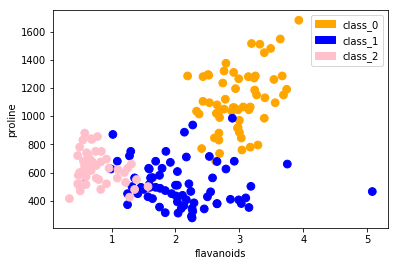

In [5]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

colores=['orange','blue','pink']

variable1=data.feature_names[6]
variable2=data.feature_names[12]

f1 = df[variable1].values
f2 = df[variable2].values
f3 = data.target

# Vamos a pintar en colores las 3 clases: naranja: 0, azul:1, rosa:2
asignar=[]
l=len(f3)
print('cantidad de observaciones:',l)
print('cantidad de clases:',3)
print('cantidad de variables/dimension:',13)
print('se grafican de a dos (dimensión 2)')

for i in range(l): #for index, row in filtered_data.iterrows():
    if(f3[i]==0):
        asignar.append(colores[0])
    elif (f3[i]==1):
        asignar.append(colores[1])
    else:
        asignar.append(colores[2])
plt.scatter(f1, f2, c=asignar, s=60)
plt.xlabel(variable1)
plt.ylabel(variable2)
patch1 = mpatches.Patch(color=colores[0], label=data.target_names[0])
patch2 = mpatches.Patch(color=colores[1], label=data.target_names[1])
patch3 = mpatches.Patch(color=colores[2], label=data.target_names[2])
plt.legend(handles=[patch1,patch2,patch3])
plt.show()

## Clasificación de imágenes 

Primero hay que identificar que tipo de clasificación se quiere realizar:

* **Dentro de una imagen (clasificación de pixeles, segmentación, detección)** o 
* **Asignar una imagen completa a una categoría (etiquetado, taggeo)**

Abordaremos 

### Clasificación dentro de una imagen

Dividir a la imagen en regiones. Los objetos/muestras a clasificar son los pixeles. ¿Qué datos/variables/características/features tenemos (o podemos obtener) de cada pixel.

**Ejemplo: Imagen monocroma**

El ejemplo más simple es cuando la imagen es monocroma una sola medida para cada pixel: la intensidad.

**2 clases: binarización**

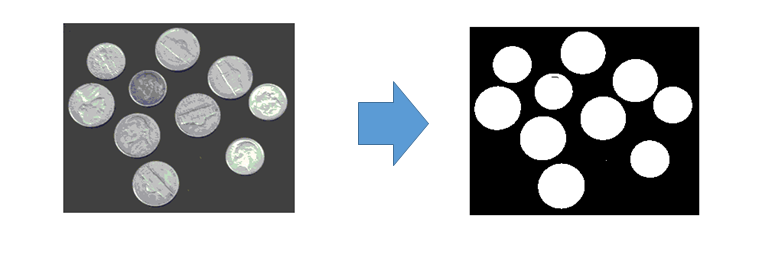

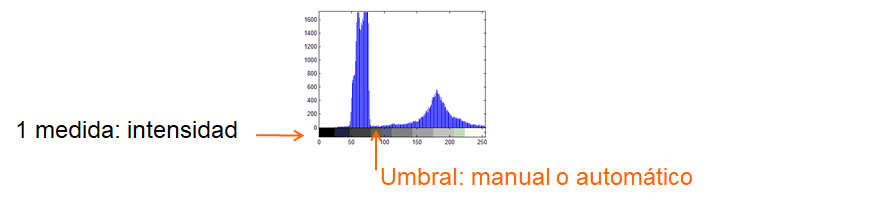

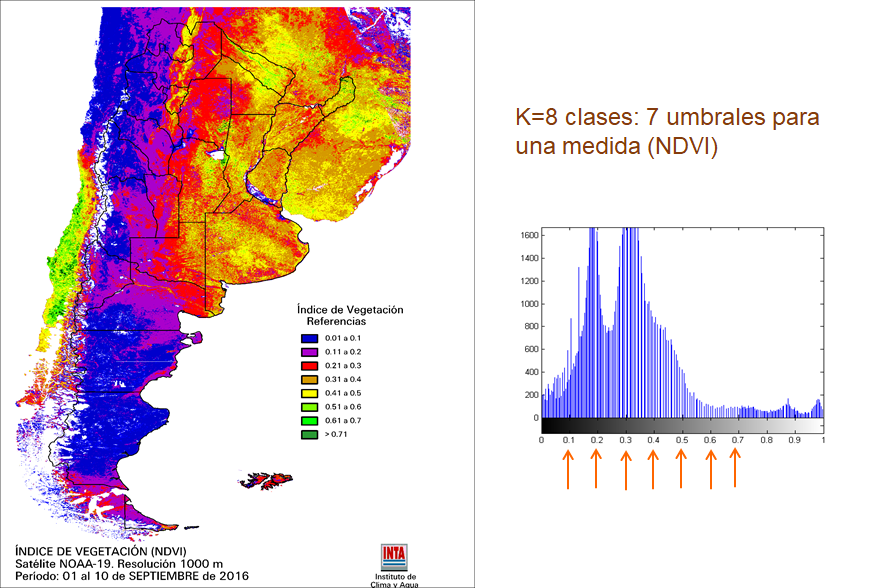

**Índice verde** en cada pixel obtenido de imágenes satelitales:

$$NDVI= \frac{(IRC-r)}{(IRC+r)}$$ 

donde $IRC$ es el Infrarrojo cercano 
y $r$ es la componente roja (del visible)

Cada pixel tiene un vector de datos o características, puede tener una, tres o más (características/datos).

**Ejemplo:** imágenes a color RGB

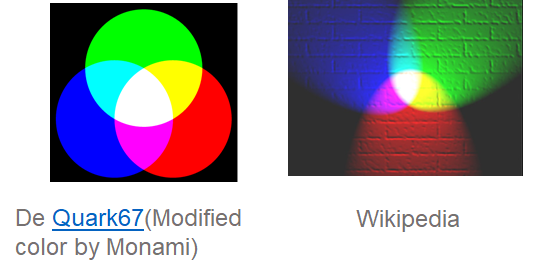

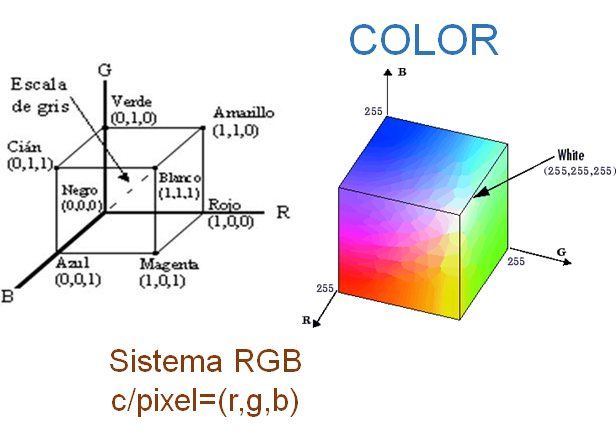

### Clasificación supervisada

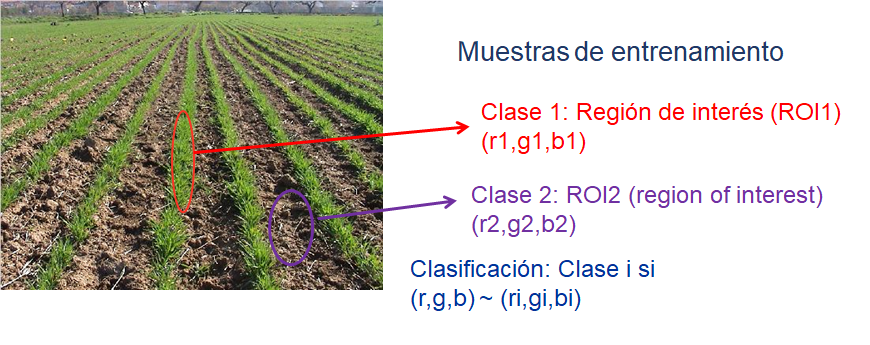

### k-nearest neibours -- k-vecinos más cercanos

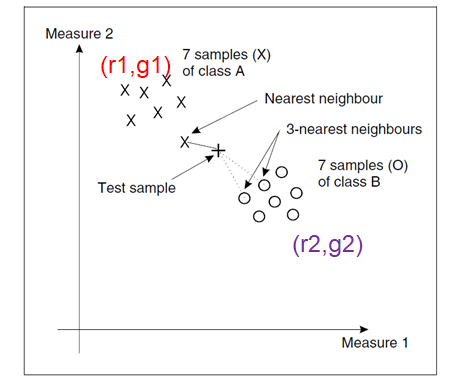

In [7]:
import cv2
campoBGR=cv2.imread('Campo.png')
cv2.imshow('pulse una tecla aquí',campo)
cv2.waitKey() #espera pulsado de tecla. 
cv2.destroyAllWindows()

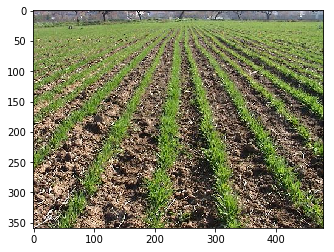

In [8]:
from matplotlib import pyplot as plt
plt.imshow(campo[:,:,[2,1,0]])
plt.show()

### Selección de ROI

In [9]:
showCrosshair = False
fromCenter = False
roi1 = cv2.selectROI("delimite la ROI+ent+tecla", campo, fromCenter, showCrosshair)
cv2.waitKey() #espera pulsado de tecla. 
print('ROI1:',roi1)
print('(columna, fila, anchocol, anchofila)')
cv2.destroyAllWindows()

ROI1: (167, 285, 0, 0)
(columna, fila, anchocol, anchofila)


In [10]:
showCrosshair = False
fromCenter = False
roi2 = cv2.selectROI("delimite la ROI+ent+tecla", campo, fromCenter, showCrosshair)
cv2.waitKey() #espera pulsado de tecla. 
print('ROI2:',roi2)
print('(columna, fila, anchocol, anchofila)')
cv2.destroyAllWindows()

ROI2: (118, 279, 62, 77)
(columna, fila, anchocol, anchofila)


In [11]:
showCrosshair = False
fromCenter = False
roi3 = cv2.selectROI("delimite la ROI+ent+tecla", campo, fromCenter, showCrosshair)
cv2.waitKey() #espera pulsado de tecla. 
print('ROI3:',roi3)
print('(columna, fila, anchocol, anchofila)')
cv2.destroyAllWindows()

ROI3: (87, 1, 115, 17)
(columna, fila, anchocol, anchofila)


In [34]:
#roi1=(211, 180, 25, 72)
#roi2=(136, 241, 47, 106)
#roi3=(145, 1, 121, 14)
rois=[roi1,roi2,roi3]

**Se pueden agregar más capas/columnas de datos, por ejemplo**
* **una capa con los bordes (Filtros Prewitt, Sobel, etc.)**
* **una capa con información de textura (Filtros de Gabor, etc.)**


In [35]:
import numpy as np
umbrali=int(80)#umbral inferior
umbrals=int(130)#umbral superior
red_edges = cv2.Canny(campo[:,:,2],umbrali,umbrals)
campo2=np.zeros((red_edges.shape[0],red_edges.shape[1],4))
campo2[:,:,0:3]=campo
campo2[:,:,3]=red_edges
print(campo2.shape)

(359, 479, 4)


In [54]:
import numpy as np
cantidad=0
for i in range(3):
    cantidad=cantidad+(rois[i][2]*rois[i][3])
print (cantidad)
data=np.zeros([cantidad,4])
target=np.zeros(cantidad)
cuenta=0
for i in range(3):
    roi=rois[i]
    
    for fil in range (roi[1],roi[1]+roi[3]):
        for col in range (roi[0],roi[0]+roi[2]):
            data[cuenta,:]=campo2[fil,col,:]
            target[cuenta]=i
            cuenta=cuenta+1
    
print(cuenta)    
import pandas as pd
df = pd.DataFrame(data, columns=["azul","verde","rojo","bordes_rojo"])
print(df.shape)
df.head(10)



8476
8476
(8476, 4)


,azul,verde,rojo,bordes_rojo
0,59.0,130.0,113.0,0.0
1,67.0,149.0,126.0,255.0
2,113.0,205.0,176.0,0.0
3,45.0,146.0,114.0,255.0
4,76.0,185.0,147.0,255.0
5,21.0,133.0,93.0,255.0
6,34.0,148.0,108.0,255.0
7,49.0,155.0,118.0,255.0
8,85.0,190.0,153.0,0.0
9,54.0,157.0,119.0,0.0


cantidad de observaciones: 8476
cantidad de clases: 3
cantidad de variables/dimension: 3
se grafican de a dos (dimensión 2)


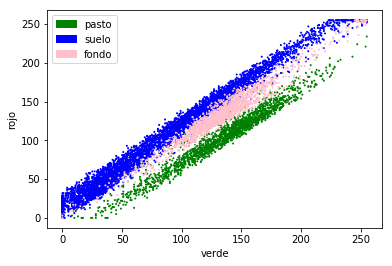

In [55]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

colores=['green','blue','pink']
variables=["azul","verde","rojo","bordes_rojo"]

variable1=variables[1]
variable2=variables[2]

f1 = df[variable1].values
f2 = df[variable2].values
f3 = target

# Vamos a pintar en colores las 3 clases: verde: 0, azul:1, rosa:2
asignar=[]
l=len(f3)
print('cantidad de observaciones:',l)
print('cantidad de clases:',3)
print('cantidad de variables/dimension:',3)
print('se grafican de a dos (dimensión 2)')

for i in range(l): #for index, row in filtered_data.iterrows():
    if(f3[i]==0):
        asignar.append(colores[0])
    elif (f3[i]==1):
        asignar.append(colores[1])
    else:
        asignar.append(colores[2])
plt.scatter(f1, f2, c=asignar, s=1)
plt.xlabel(variable1)
plt.ylabel(variable2)
patch1 = mpatches.Patch(color=colores[0], label='pasto')
patch2 = mpatches.Patch(color=colores[1], label='suelo')
patch3 = mpatches.Patch(color=colores[2], label='fondo')
plt.legend(handles=[patch1,patch2,patch3])
plt.show()

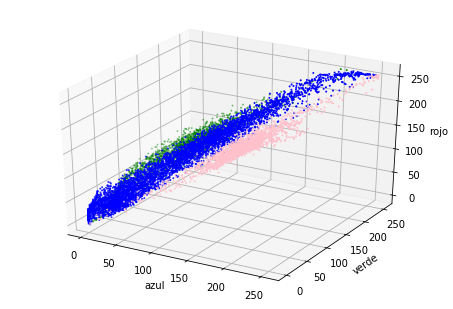

In [57]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

fig = pyplot.figure()
ax = Axes3D(fig)

ax.scatter(df[variables[0]].values, df[variables[1]].values, df[variables[2]].values,c=asignar, s=1)
ax.set_xlabel(variables[0])
ax.set_ylabel(variables[1])
ax.set_zlabel(variables[2])
plt.show()

#pyplot.show()

**k-Nearest Neighbor con Scikit Learn Definimos el valor de k en 5 **

In [45]:
from sklearn.neighbors import KNeighborsClassifier
n_neighbors = 5

knn = KNeighborsClassifier(n_neighbors)
knn.fit(data, target)
print('Presición (Accuracy) del clasificador K-NN en el conjunto de entrenamiento: {:.2f}'
     .format(knn.score(data, target)))

Presición (Accuracy) del clasificador K-NN en el conjunto de entrenamiento: 0.98


**Clasifiquemos la imagen completa:**

(359, 479, 3)
[0.]


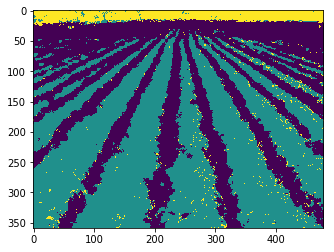

In [46]:
a=campo.shape
print(a)
clasif=np.zeros(a[0:2])
print(knn.predict([[40, 80, 40, 255]]))
for i in range(a[0]): #filas
    for j in range(a[1]): #columnas
        clasif[i,j]=knn.predict([campo2[i,j,:]])
        
plt.imshow(clasif)
        

## Mejora de la clasificación

* Filtro o algoritmo de modas (iterado)
* Moda: es el valor más repetido

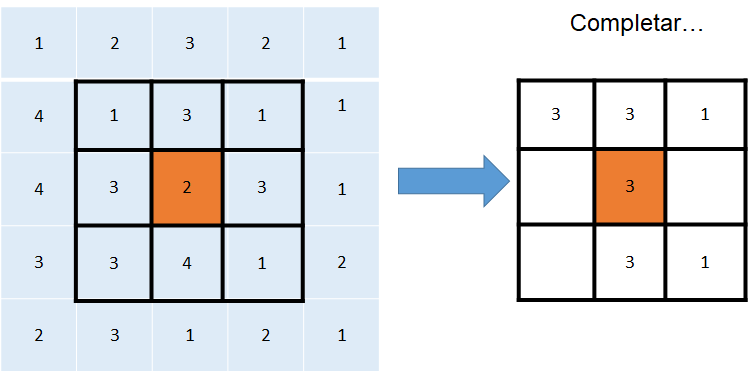

In [47]:
from statistics import mode
clasif2=clasif.copy()
for i in range(2,a[0]-2): #filas
    for j in range(2,a[1]-2): #columnas
        try:
            clasif2[i,j]=mode(clasif[i-2:i+3,j-2:j+3].ravel())
        except:
            clasif2[i,j]=clasif[i,j]
        

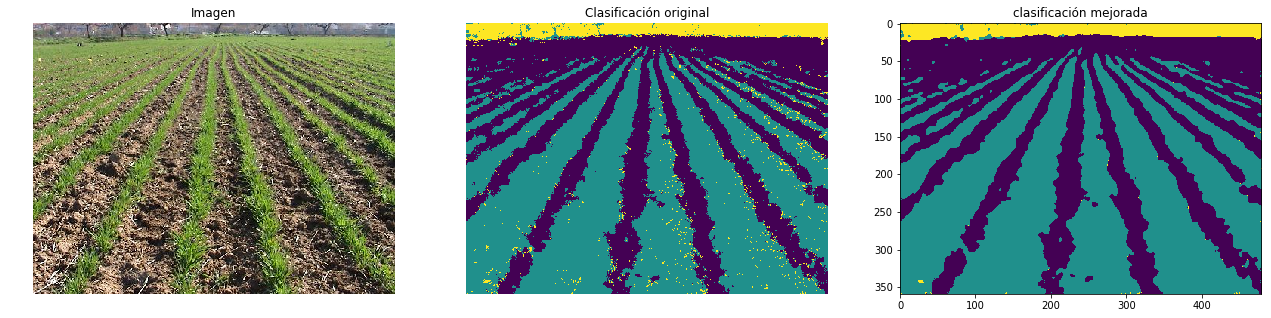

In [48]:
fig, axs = plt.subplots(nrows=1, ncols=3, sharex=True)
fig.set_figheight(15)
fig.set_figwidth(22)
axs[0].imshow(campo[:,:,[2,1,0]])
axs[0].set_title("Imagen")
axs[0].axis('off')
axs[1].imshow(clasif)
axs[1].set_title("Clasificación original")
axs[1].axis('off')
axs[2].imshow(clasif2)
axs[2].set_title('clasificación mejorada')
#axs[2].axis('off')
plt.show()

**K-means o k-medias es un método automático de clasificación no supervisada. En este caso K es la cantidad de clases, es un parámetro del algoritmo, el usuario lo tiene que elgir.**
* genera aleatoriamente K centroides en el espacio de las variables (dimensión n=cantidad de variables/features).
* casifica los datos en K clases por cercanía (menor distancia euclídea) a los centroides.
* recalcula los K centroides usando el centro de masa (promedio) de cada clase.
* se repite el proceso de clasificación y recálculo de los centroides hasta la estabilidad (K clases estables)

In [60]:
from sklearn.cluster import KMeans
# Se agrupan los datos usando Kmedias en 3 clusters 
kmeans = KMeans(n_clusters=3)#de define el modelo
kmeans.fit(df)#de ajusta el modelo
df_clusters=df.copy()
df_clusters['kmedias_3']=kmeans.labels_
df_clusters.head()

,azul,verde,rojo,bordes_rojo,kmedias_3
0,59.0,130.0,113.0,0.0,0
1,67.0,149.0,126.0,255.0,1
2,113.0,205.0,176.0,0.0,0
3,45.0,146.0,114.0,255.0,1
4,76.0,185.0,147.0,255.0,1


## Clasificación de varias imágenes  (taggeo)

In [50]:
import cv2
digitos=cv2.imread('digits.png')

cv2.imshow('pulse una tecla aqui',digitos)
cv2.waitKey() #espera pulsado de tecla. 
cv2.destroyAllWindows()

In [104]:
print(type(digitos))

<class 'numpy.ndarray'>


In [51]:
from sklearn import datasets
digits = datasets.load_digits()
print(digits.data.shape)

import pandas as pd
df = pd.DataFrame(digits.data)
df.head()

(1797, 64)


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


**Cada fila contiene los 64 pixeles de la imagen de un dígito** 

hay 1797 imágenes/muestras de 8x8 con 10 tipos/clases de dígitos


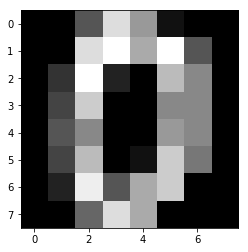

In [119]:
import numpy as np
primero=np.reshape(digits.data[0,:], [8,8])
plt.imshow(primero,cmap='gray')
plt.show()
